In [1]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from math import atan, sin, cos
import numpy as np

### Helper codes in the assignment paper

In [ ]:
def show_2d(vertices, edges, size):
    fig = plt.figure()
    ax = fig.gca()
    for edge in edges:
        p1 = vertices[edge[0]]
        p2 = vertices[edge[1]]
        ax.plot([p1[0], p2[0]],
               [p1[1], p2[1]])
    ax.set_xlim(0, size[0])
    ax.set_ylim(0, size[1])
    plt.show()

In [113]:
def show_3d(vertices, edges):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    for edge in edges:
        p1 = vertices[edge[0]]
        p2 = vertices[edge[1]]
        ax.plot([p1[0], p2[0]],
               [p1[1], p2[1]],
               [p1[2], p2[2]])
    ax.set_ylim(-5, 5)
    ax.set_xlim(-5, 5)
    ax.set_zlim(-5, 5)
    plt.show()

### Corners and Edges that define the cube in the 3D vector space.

In [17]:
corners = np.array([[1., 1., 1.], [-1., 1., 1.], [-1., -1., 1.], [1., -1., 1.],
                   [1., 1., -1.], [-1., 1., -1.], [-1., -1., -1.], [1., -1., -1.]])
edges = [(0, 1), (1, 2), (2, 3), (0, 3), (0, 4), (1, 5), (2, 6), (3, 7), (4, 5), (5, 6), (6, 7), (4, 7)]

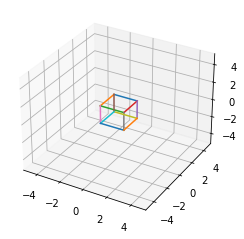

In [18]:
show_3d(corners, edges)

### Rotation matrix that rotates a vector around a given unit vector (the first argument of the function) for a given angle (the second argument of the function, radian). This function gives the homogenous version (4 X 4) of the given 3 X 3 rotation matrix.

In [42]:
def rotation_matrix(unit_vector, theta):
    eps = 1.0e-12
    #theta = (np.pi * angle) / (180.0)
    length = unit_vector.shape[0]
    assert length == 3
    
    ux = unit_vector[0]
    uy = unit_vector[1]
    uz = unit_vector[2]
    vector_norm = np.sqrt(ux**2 + uy**2 + uz**2)
    assert 1.0 - eps < vector_norm < 1.0 + eps
    
    r11 = cos(theta) + ux**2 * (1.0 - cos(theta))
    r12 = ux * uy * (1.0 - cos(theta)) - uz * sin(theta)
    r13 = ux * uz * (1.0 - cos(theta)) + uy * sin(theta)
    r21 = uy * ux * (1.0 - cos(theta)) + uz * sin(theta)
    r22 = cos(theta) + uy ** 2 * (1.0 - cos(theta))
    r23 = uy * uz * (1.0 - cos(theta)) - ux * sin(theta)
    r31 = uz * ux * (1.0 - cos(theta)) - uy * sin(theta)
    r32 = uz * uy * (1.0 - cos(theta)) + ux * sin(theta)
    r33 = cos(theta) + uz**2 * (1.0 - cos(theta))
    
    output = np.array([[r11, r12, r13, 0.0], [r21, r22, r23, 0.0], [r31, r32, r33, 0.0], [0.0, 0.0, 0.0, 1.0]])
    return output

### Function that gives a translation matrix, which is the homogenous version (4X4).

In [57]:
def translation_matrix(c):
    length = c.shape[0]
    assert length == 3
    
    cx = c[0]
    cy = c[1]
    cz = c[2]
    
    output = np.array([[1.0, 0.0, 0.0, -cx], [0.0, 1.0, 0.0, -cy], [0.0, 0.0, 1.0, -cz], [0.0, 0.0, 0.0, 1.0]])
    return output

### This function gives the matrix product of the rotation matrix and translation matrix.

$R_{rot} T$

In [58]:
def get_extrinsic_matrix(position, orientation):
    # First translate
    t_mat = translation_matrix(position)
    # Rotate around the x-axis.
    rx_mat = rotation_matrix(np.array([1.0, 0.0, 0.0]), orientation[0])
    ry_mat = rotation_matrix(np.array([0.0, 1.0, 0.0]), orientation[1])
    rz_mat = rotation_matrix(np.array([0.0, 0.0, 1.0]), orientation[2])
    
    # Compute the resulting matrix: T R_z R_y R_x
    output = np.matmul(ry_mat, rx_mat)
    output = np.matmul(rz_mat, output)
    output = np.matmul(t_mat, output)
    return output

### This function returns the homogenous version of the given vector representing a point in 3D vector space.

$\begin{bmatrix}x & y & z\end{bmatrix}^\top \rightarrow \begin{bmatrix} x & y & z & 1 \end{bmatrix}^\top$

In [59]:
def to_homogenous(points):
    output = []
    for point in points:
        output.append([point[0], point[1], point[2], 1.0])
    
    output = np.array(output)
    return output

### This function bring back from the given homogenous vector to the corresponding vector in the 3D vector space.

$\begin{bmatrix} x & y & z & w \end{bmatrix}^\top \rightarrow \begin{bmatrix} x/w & y/w & z/w \end{bmatrix}$

### This also works for vectors in the 2D vector space and their corresponding homogenous vectors.

In [60]:
def from_homogenous(points):
    output = []
    for point in points:
        w = point[-1]
        output.append(point[:-1] / w)
    output = np.array(output)
    return output

### Define the position and orientation of the camera to apply the translation and rotation defined above, to the cube. After that, we visualize the transformed cube in 3D space.

In [68]:
camera_position = np.array([0., 0., -3.0])
camera_orientation = np.array([0., 0.1, 0.])

extrinsic_matrix = get_extrinsic_matrix(camera_position, camera_orientation)

homo_rot_corners = []

homo_corners = to_homogenous(corners)

for homo_corner in homo_corners:
    homo_rot_corner = np.matmul(extrinsic_matrix, homo_corner)
    homo_rot_corners.append(homo_rot_corner)

homo_rot_corners = np.array(homo_rot_corners)
rot_corners = from_homogenous(homo_rot_corners)

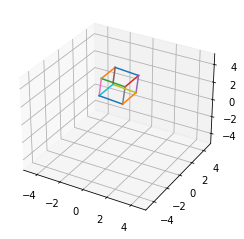

In [69]:
show_3d(rot_corners, edges)

### Now we project the transformed cube (i.e., cube when our coordinate system is at the position and orientation of the camera). in the 2D image plane. Hence we define the function which returns a instrinsic matrix.

In [77]:
def get_intrinsic_matrix(f, s):
    assert s.shape[0] == 2
    sx = s[0]
    sy = s[1]
    
    mat_k = np.array([[f, 0., sx], [0., f, sy], [0., 0., 1.]])
    projection = np.array([[1., 0., 0., 0.], [0., 1., 0., 0.], [0., 0., 1., 0.]])
    output = np.matmul(mat_k, projection)
    return output

### Define the focal length and lense coefficients to apply the instrinsic matrix to the transformed cube. After that, we visualize the 2D image that camera obtained.

In [78]:
f = 0.6
s = np.array([0.5, 0.5])

extrinsic_matrix = get_extrinsic_matrix(camera_position, camera_orientation)
intrinsic_matrix = get_intrinsic_matrix(f, s)

homo_rot_corners = []
homo_corners = to_homogenous(corners)
for homo_corner in homo_corners:
    homo_rot_corner = np.matmul(extrinsic_matrix, homo_corner)
    homo_rot_corner = np.matmul(intrinsic_matrix, homo_rot_corner)
    homo_rot_corners.append(homo_rot_corner)

homo_rot_corners = np.array(homo_rot_corners)
rot_corners = from_homogenous(homo_rot_corners)

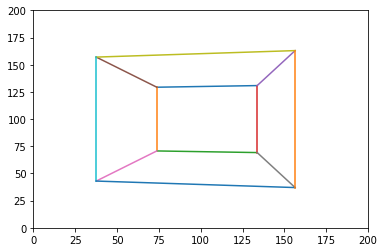

In [85]:
show_2d(rot_corners * 200, edges, (200, 200))

### Bonus problem: Tube projection

### Following function returns vertices and edges of an arbitrary prism.

In [91]:
def create_vertices_and_edges_of_tube(n):
    assert n >= 3
    corners_2d = []
    edges = []
    
    p = np.array([1., 1.])
    corners_2d.append(p)
    
    theta = 2 * np.pi / n
    rot_mat = np.array([[cos(theta), -sin(theta)], [sin(theta), cos(theta)]])
    
    for i in range(n-1):
        p = np.matmul(rot_mat, p)
        corners_2d.append(p)
    corners = []
    
    # upper side corners
    for p in corners_2d:
        px = p[0]
        py = p[1]
        corners.append([px, py, 1.0])
    
    # down side corners
    for p in corners_2d:
        px = p[0]
        py = p[1]
        corners.append([px, py, -1.0])
    
    corners = np.array(corners)
    
    edges = []
    # upper sied edges
    for i in range(n-1):
        edges.append((i, i+1))
    edges.append((n-1, 0))
    
    # down side edges
    for i in range(n-1):
        edges.append((n+i, n+i+1))
    edges.append((2*n-1, n))
    
    # middle side edges
    for i in range(n):
        edges.append((i, n+i))
    
    return corners, edges

### We check our n-prism returning function by visualizing it.

In [111]:
corners, edges = create_vertices_and_edges_of_tube(20)

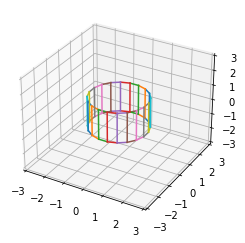

In [112]:
show_3d(corners, edges)

### As in the case we handled the cube, we define the position and orientation of the camera, and apply the extrinsic matrix to the vectors corresponding to the each corners of the tube.

In [116]:
camera_position = np.array([0., 0., -3.0])
camera_orientation = np.array([0., 0.1, 0.])

extrinsic_matrix = get_extrinsic_matrix(camera_position, camera_orientation)

homo_rot_corners = []

homo_corners = to_homogenous(corners)

for homo_corner in homo_corners:
    homo_rot_corner = np.matmul(extrinsic_matrix, homo_corner)
    homo_rot_corners.append(homo_rot_corner)

homo_rot_corners = np.array(homo_rot_corners)
rot_corners = from_homogenous(homo_rot_corners)

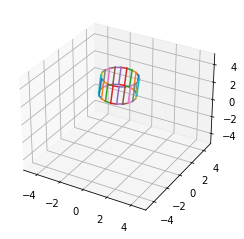

In [117]:
show_3d(rot_corners, edges)

### Finally, get the Intrinsic matrix and apply it to the transformed tube, so that we obtain the 2D image that camera observed.

In [118]:
f = 0.6
s = np.array([0.5, 0.5])

extrinsic_matrix = get_extrinsic_matrix(camera_position, camera_orientation)
intrinsic_matrix = get_intrinsic_matrix(f, s)

homo_rot_corners = []
homo_corners = to_homogenous(corners)
for homo_corner in homo_corners:
    homo_rot_corner = np.matmul(extrinsic_matrix, homo_corner)
    homo_rot_corner = np.matmul(intrinsic_matrix, homo_rot_corner)
    homo_rot_corners.append(homo_rot_corner)

homo_rot_corners = np.array(homo_rot_corners)
rot_corners = from_homogenous(homo_rot_corners)

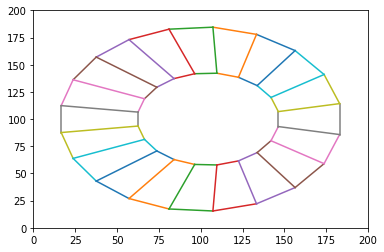

In [119]:
show_2d(rot_corners * 200, edges, (200, 200))